# Titanic survivor

## Step1 :Import Libraries

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step2 : Retrieve the data

In [88]:
data = pd.read_csv("E:\MachineLearningCoursera\datasets\Titanic-Dataset.csv")

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step3 : Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

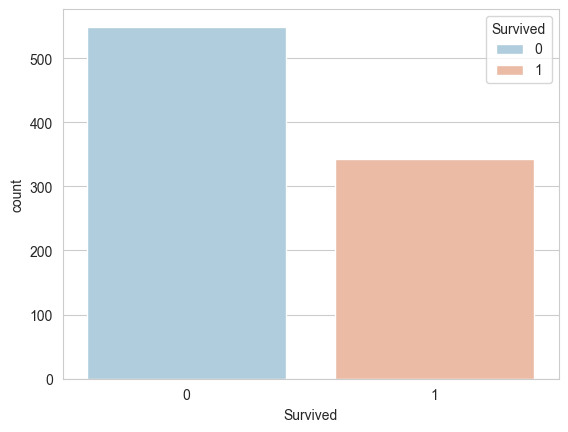

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Survived', data=data, palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

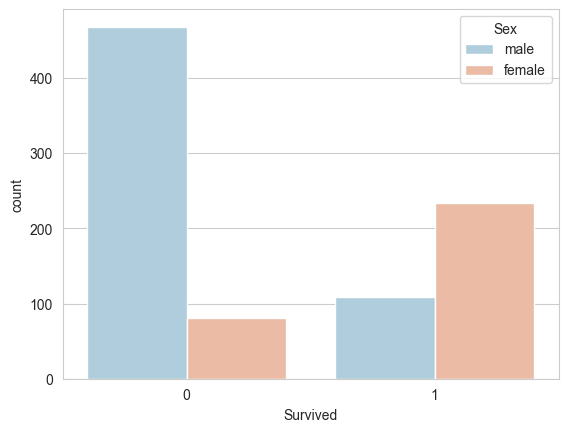

In [31]:
sns.countplot(x='Survived', hue='Sex', data=data, palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

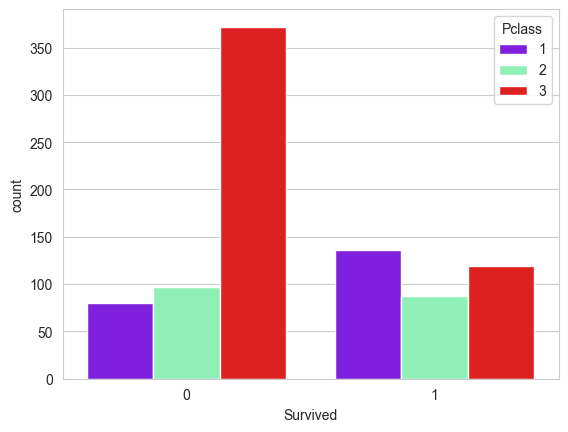

In [32]:
sns.countplot(x='Survived', hue='Pclass', data=data, palette="rainbow")

<Axes: xlabel='Age', ylabel='Count'>

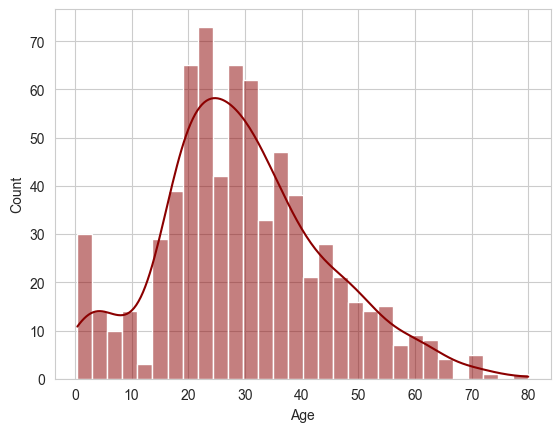

In [23]:
#Le paramètre kde contrôle l’affichage de la courbe de densité (Kernel Density Estimate).
sns.histplot(data['Age'],kde=False , color='darkred', bins=30)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### creates a heatmap that visualizes the missing values

<Axes: >

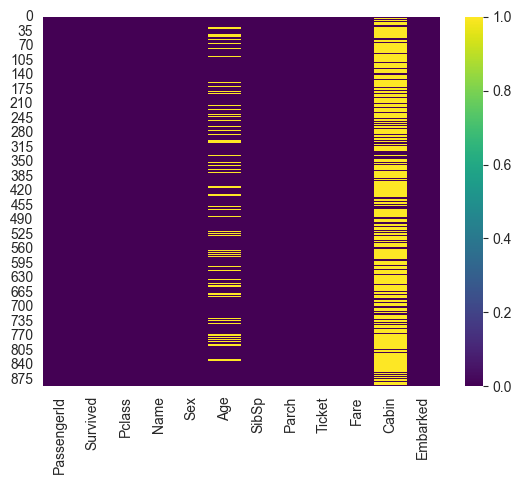

In [33]:
sns.heatmap(data.isnull(),cmap='viridis')

## Data Cleaning

 We want to fill in missing age data instead of just dropping the missing age data rows. On way to do this is by filling in the mean age of all passengers(imputation). However we can be smarter about this  and check the average age by passenger class.For example:

<Axes: xlabel='Pclass', ylabel='Age'>

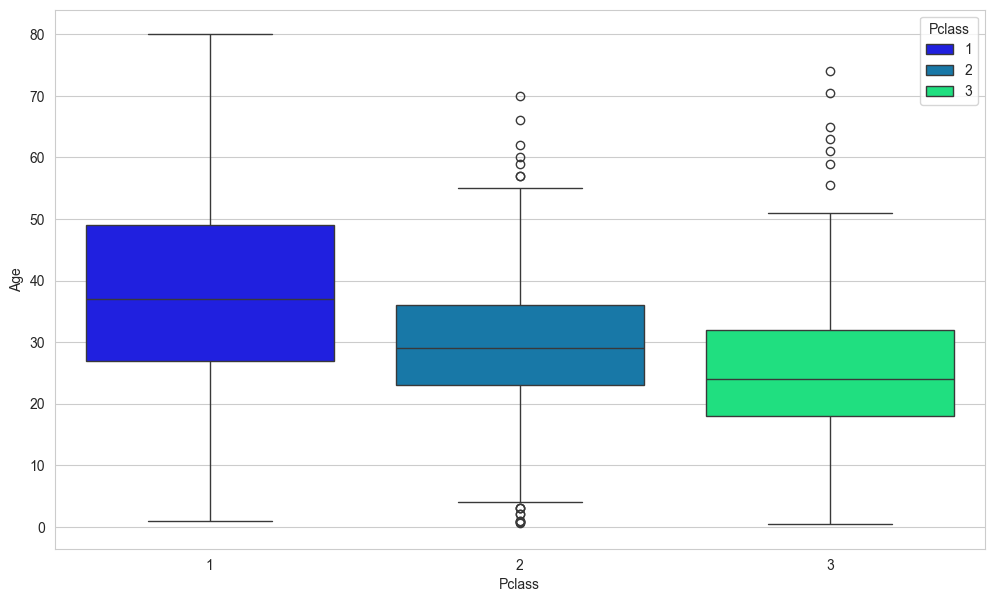

In [37]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age' , hue='Pclass', data=data, palette='winter')

We can see the wealthier passengers in the higher class tend to be older, wich makes sens. W'll use these average age values to impute based on Pclass for Age.

In [77]:
def impute_age(cols):
    Age= cols.iloc[0]
    Pclass= cols.iloc[1]

    if pd.isnull(Age):

        if Pclass== 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

    

Now Apply that function

In [89]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [79]:
data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [90]:
data[['Age','Pclass']].head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


<Axes: >

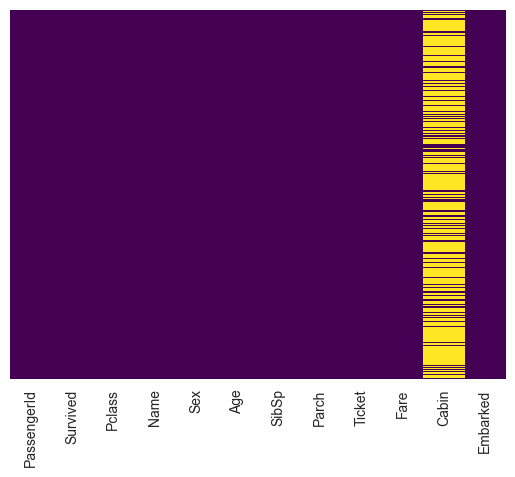

In [95]:
sns.heatmap(data.isnull(), yticklabels=False ,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN 

In [96]:
data.drop('Cabin',axis=1,inplace=True)

In [97]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [98]:
data.dropna(inplace=True)

In [99]:
data.shape

(889, 11)

<Axes: >

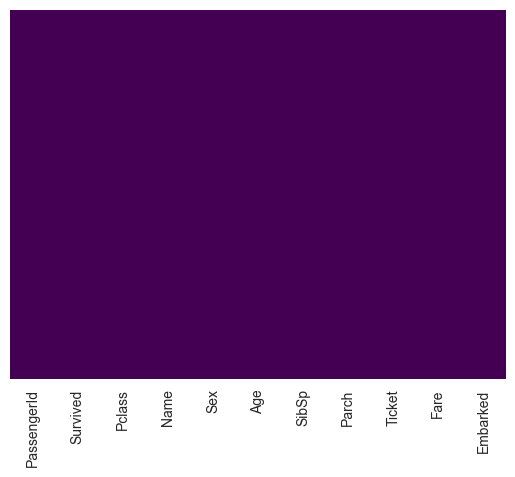

In [100]:
sns.heatmap(data.isnull(), yticklabels=False ,cbar=False,cmap='viridis')

## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! otherwise our machine learning algorithm won't be able to directly take in those features an inputs.

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [104]:
sex = pd.get_dummies(data['Sex'], drop_first=True)

In [108]:
embarked = pd.get_dummies(data['Embarked'], drop_first=True)

In [109]:
data.drop(['Sex','Embarked', 'Name','Ticket'] ,axis=1,inplace=True)

In [110]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [111]:
data= pd.concat([data,sex,embarked],axis=1)

In [112]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [113]:
# Sélectionner les colonnes de type booléen
bool_cols = data.select_dtypes(include='bool').columns

# Les convertir en int
data[bool_cols] = data[bool_cols].astype(int)

In [114]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our Data is ready for our model :

## Step4 : Preparing the data into train and test

Let's start by splitting our data into a training set ad test set.

## Train Tast Split

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('Survived',axis=1), data['Survived'],test_size=0.3,random_state=101)    

## Step5 : Build a Logistic Regression model for classification

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
logmodel = LogisticRegression(solver = 'liblinear')

## Step 6 : Train the model

In [120]:
logmodel.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


Let's move on  to evaluate our model

## Step 7 : Evaluation

In [122]:
predictions = logmodel.predict(X_test)

We can check precision/recall /f1 score using classification report!

In [123]:
from sklearn.metrics import classification_report

In [125]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
print('confusion matrix :\n', confusion_matrix(y_test,predictions))

confusion matrix :
 [[151  12]
 [ 36  68]]


In [128]:
tn, fp,fn,tp = confusion_matrix(y_test,predictions).ravel()
print(tn, fp,fn,tp )

151 12 36 68
